## Decision Tree model implementation

Import python modules

In [1]:
import numpy as np
import csv
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

Read in train and test data, Compute MAE, Plot

In [2]:
def read_data(crop):

    feature = pd.read_csv('outputData/dailyUsage/featureData.csv') 
    label = pd.read_csv('outputData/dailyUsage/'+crop+'.csv') 
    return feature, label

In [3]:
def compute_error(y_hat, y):
    return np.abs(y_hat - y).mean()

def plot_image(xlabel, label, prediction,x):

    plt.figure(figsize=(15,10))
    plt.title("Decision Tree scatter diagram.") 
    plt.xlim(xmax=2600,xmin=0)
    plt.ylim(ymax=x,ymin=0)
    plt.xlabel("Days")
    plt.ylabel("Water Usage")

    plt.scatter(xlabel, label, color='gray', marker='o', s=9, edgecolor='blue', alpha=0.5)
    plt.scatter(xlabel, prediction, color='gray', marker='o', s=9, edgecolor='red', alpha=0.5)
    plt.show()

In [4]:
def figureshape():
    global feature, label
    #feature, label = read_data(crop)
    feature.fillna(0,inplace = True)
    feature = np.array(feature)
    label = np.array(label)
    label = label.reshape((-1))
    xlabel = pd.read_csv('outputData/dailyUsage/x_daily.csv')
    xlabel = np.array(xlabel)
    xlabel = xlabel.reshape((-1))
    return xlabel

In [5]:
def modelfitting(xlabel,label,x):
    global feature
    # K-fold CV to get training data and test data
    final_accur = 100000
    kf = KFold(n_splits=5,shuffle=True)
    for train_index , test_index in kf.split(feature):
        X_train, X_test = feature[train_index], feature[test_index]
        y_train, y_test = label[train_index], label[test_index]
    # Fit regression model
        max_depths = [25]
        for max_depth in max_depths:
            regr = DecisionTreeRegressor(max_depth = max_depth)
            regr.fit(X_train, y_train)

    # Predict
            y_pred = regr.predict(X_test)

    # Calculate accurcy
            accur = compute_error(y_pred , y_test)
            if accur < final_accur:
                final_accur = accur
    print('Mean Absolute Error of Decision Tree Modle: ', final_accur)

    prediction = regr.predict(feature)
    plot_image(xlabel, label, prediction,x)
    return prediction

rice daily water usage

Mean Absolute Error of Decision Tree Modle:  0.0160388315050008


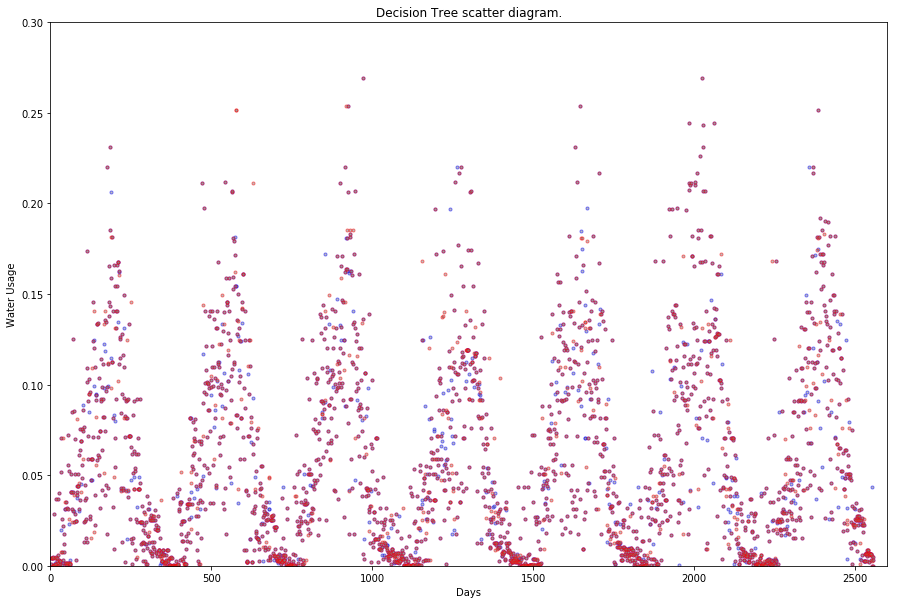

In [6]:
feature, label = read_data('rice_waterUsage')
xlabel=figureshape()
prediction=modelfitting(xlabel,label,0.3)
#output = pd.DataFrame(data = prediction)
#output.to_csv(('outputData/ricePrediction/dt_rice_waterUsage.csv'))

maize daily water usage

Mean Absolute Error of Decision Tree Modle:  0.0044657661267090455


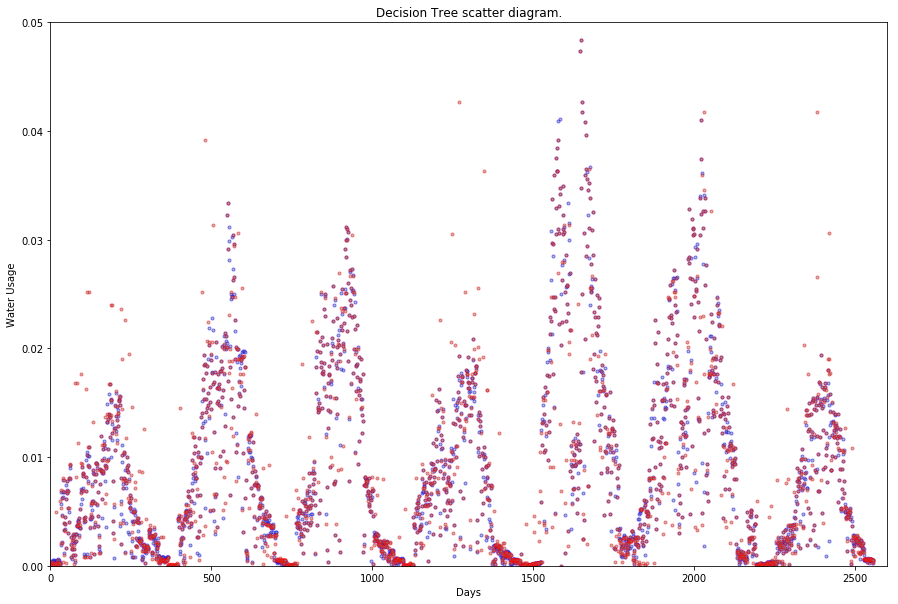

In [7]:
feature, label = read_data('maize_waterUsage')
xlabel=figureshape()
mprediction=modelfitting(xlabel,label,0.05)

wheat daily water usage

Mean Absolute Error of Decision Tree Modle:  0.016498224184442273


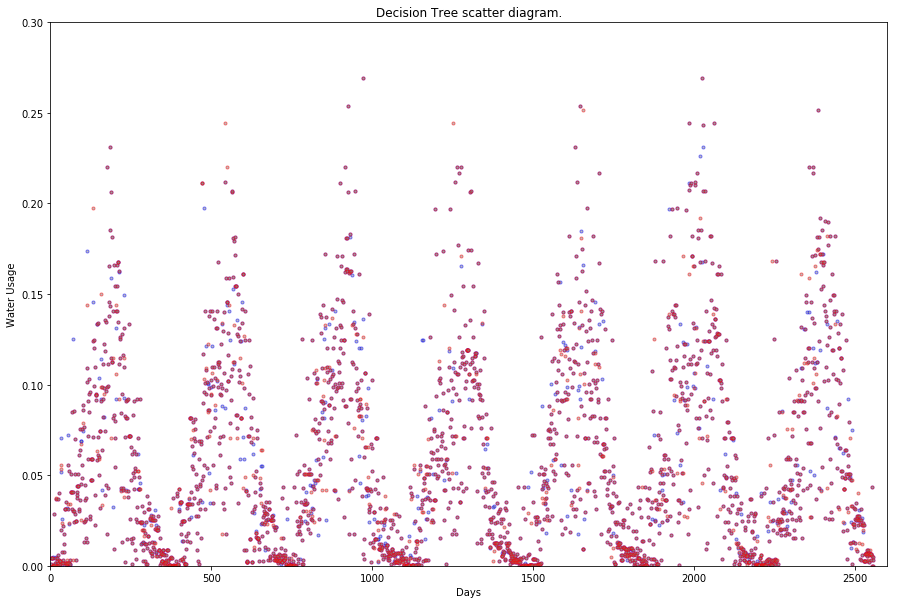

In [8]:
feature, label = read_data('wheat_waterUsage')
xlabel=figureshape()
wprediction=modelfitting(xlabel,label,0.3)